# Advanced Level Task 1
# Develop A Neural Network That Can Read Handwriting

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find here.

# Imports

Note: "%matplotlib inline" is used in order to allow the images to be displayed inside the notebook otherwise it would display a dump of the images location

In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Loading the MNIST dataset from the tensorflow library

In [122]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Shapes of the traning and testing arrays

We can see that the labels are rank one arrays whereas the feature vectors are 3-dimensional

In [123]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


# Displaying a sample

We have taken the sample at index number 510 and have displayed the corresponsing image below. The label of the image confirms that it is indeed '1' in the image

Label of image:  1


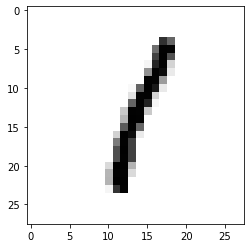

In [124]:
image_number = 510
print("Label of image: ", Y_train[image_number])
plt.imshow(X_train[image_number], cmap='Greys')

# Reshaping the feature vectors

We need to reshape the arrays as the tensorflow keras API required 4-dimensional NumPy arrays and the arrays that we have are 3-dimensional.

In [125]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Changing feature types
After we have successfully reshaped the features we now need to convert the data into float as we are going to be normalizing the data and we need to be able to obtain values in decimal points.

In [126]:
image_shape = (28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
After the conversion of the features into float we now need to normalize our vectors as it will allow our neural network to converge faster and work more efficiently.

In [127]:
X_train /= 255
X_test /= 255

# Printing the shapes after transformations

In [128]:
print("X_train shape:", X_train.shape)
print(f"X_train has {X_train.shape[0]} images")
print(f"X_test has {X_test.shape[0]} images")

X_train shape: (60000, 28, 28, 1)
X_train has 60000 images
X_test has 10000 images


# Building the Convolutional Neural Network(CNN) Model

We are going to be building a sequential so we will save the sequential model into the variable "cnn".
We are going to be using the following layers to build our Convolutional Neural Network:
1. Convolutional Layer (Conv2D): Concolutional Layer performs the convolution operation which is used to extract the feature maps
2. MaxPooling Layer: Max Pooling allows us to reduce the spatial size of the image by disregarding the unnecessary features
3. Flatten Layer: This layer just unravels the data from a 2D array to a 1D array
4. Dense Layer: This is a fully connected layer in which all the hidden units in one layer are connected to all the hidden units in the next layer
5. Dropout Layer: It allows us to prevent iverfitting by removing output from some of the neurons

In [129]:
cnn = Sequential()
cnn.add(Conv2D(28, kernel_size=(4,4), input_shape=image_shape))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())
cnn.add(Dense(128, activation=tf.nn.relu))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation=tf.nn.softmax))

# Compiling the Neural Network

We have used "adam" optimizer as it performs back-propagation very efficiently and converges pretty quickly, we have also defined the loss function which is "sparse_categorical_crossentropy" and we have asked for "accuracy" as a scoring metric.

**Note: Not showing the training process due to time constraints.**

In [45]:
cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnn.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 42s 21ms/step - loss: 0.3707 - accuracy: 0.8914
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 3/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 4/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 5/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 6/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0228 - accuracy: 0.99257s - loss: 0.0223 - accuracy: 0.99 - ETA: 7s - loss: 0.0223 - accuracy: 0.99 - ETA: 7s - l - E
Epoch 7/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0197 - accuracy: 0.99320s - los
Epoch 8/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0187 - accuracy: 0.9934
Epoch 9/15
1875/1875 [==============================] - 38s 20ms/s

# Evaluating the model

In [133]:
accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy: {accuracy[1]*100}%")

313/313 [==============================] - 4s 12ms/step - loss: 0.0615 - accuracy: 0.9835
Accuracy: 98.35000038146973%


# Displaying image along with its predicted label

Predicted Label: 7


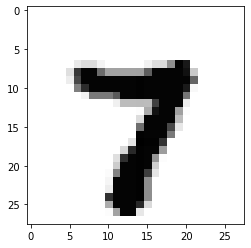

In [134]:
image_number = 1100
plt.imshow(X_test[image_number].reshape(28, 28),cmap='Greys')
Y_pred = cnn.predict(X_test[image_number].reshape(1, 28, 28, 1))
print(f"Predicted Label: {Y_pred.argmax()}")